In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [92]:
import warnings
warnings. filterwarnings('ignore')

In [2]:
df = pd.read_csv("ks-projects-201801.csv", parse_dates=['deadline', 'launched'])

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.shape

(378661, 15)

In [5]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [7]:
list(df.columns)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [9]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [10]:
# There are 2799 live projects which will labeled in future. Our interest is to predict failed or successful projects

In [11]:
# drop live projects
print('Before droping live project, shape of the dataset',df.shape)
df1 = df.query('state != "live"')
print('After droping live project, shape of the dataset',df1.shape)

Before droping live project, shape of the dataset (378661, 15)
After droping live project, shape of the dataset (375862, 15)


In [12]:
# group the data into successful and not successful
df1 = df1.assign(success = (df1['state'] == 'successful').astype(int))

In [13]:
df1['success'].value_counts()

0    241906
1    133956
Name: success, dtype: int64

In [14]:
df1['success'].value_counts(normalize=True)

0    0.643603
1    0.356397
Name: success, dtype: float64

In [15]:
df1['launched'].min()

Timestamp('1970-01-01 01:00:00')

In [16]:
df1['launched'].max()

Timestamp('2018-01-02 03:05:10')

In [17]:
df1 = df1.assign(hour = df.launched.dt.hour, 
                 day = df.launched.dt.day, 
                 month = df.launched.dt.month, 
                 year = df.launched.dt.year)

In [18]:
df1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,hour,day,month,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,12,11,8,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,4,2,9,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,12,1,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,3,17,3,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,8,4,7,2015


In [19]:
df1.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,hour,day,month,year
count,3.758620e+05,3.758620e+05,3.758620e+05,375862.000000,3.720660e+05,3.758620e+05,3.758620e+05,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000
mean,1.074660e+09,4.887465e+04,9.687431e+03,105.896866,7.080215e+03,9.082678e+03,4.532720e+04,0.356397,13.091637,15.294741,6.425403,2014.227014
std,6.191365e+08,1.176595e+06,9.588649e+04,909.952393,7.893105e+04,9.127075e+04,1.145865e+06,0.478935,7.712252,8.809024,3.310220,1.925235
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000,1.000000,1.000000,1970.000000
25%,5.380103e+08,2.000000e+03,3.000000e+01,2.000000,1.800000e+01,3.100000e+01,2.000000e+03,0.000000,5.000000,8.000000,4.000000,2013.000000
50%,1.075277e+09,5.100000e+03,6.250000e+02,12.000000,4.000000e+02,6.274500e+02,5.480000e+03,0.000000,16.000000,15.000000,6.000000,2014.000000
75%,1.610139e+09,1.600000e+04,4.090000e+03,56.000000,3.056957e+03,4.064463e+03,1.550000e+04,1.000000,20.000000,23.000000,9.000000,2016.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.000000,23.000000,31.000000,12.000000,2018.000000


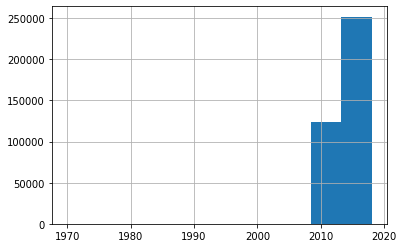

In [20]:
import matplotlib.pyplot as plt
df1['year'].hist()
plt.show()

In [21]:
df1['year'].sort_values().head(20)

94579     1970
319002    1970
247913    1970
273779    1970
48147     1970
2842      1970
75397     1970
139431    2009
89388     2009
100377    2009
309734    2009
338538    2009
24262     2009
309704    2009
324633    2009
262536    2009
148638    2009
355980    2009
262521    2009
294859    2009
Name: year, dtype: int64

In [22]:
# remove the 1970 data. Kickstarter started after 2009.
df1 = df1[(df1['year'] >= 2009)]

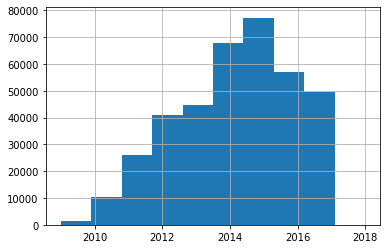

In [23]:
df1['year'].hist()

In [24]:
df1 = df1.assign(dhour=df1.deadline.dt.hour,
               dday=df1.deadline.dt.day,
               dmonth=df1.deadline.dt.month,
               dyear=df1.deadline.dt.year)

In [25]:
df1 = df1.assign(total_year= df1.dyear-df1.year)
df1 = df1.assign(total_month = df1.total_year*12 + (df1.dmonth-df1.month))
df1 = df1.assign(total_day = df1.total_month * 30 + (df1.dday - df1.day))
df1 = df1.assign(total_hour = df1.total_day * 24 + (df1.dhour - df1.hour))

In [26]:
data = df1.query('total_hour >= 0')

In [27]:
data.shape

(375854, 28)

In [28]:
df['goal']

0          1000.0
1         30000.0
2         45000.0
3          5000.0
4         19500.0
           ...   
378656    50000.0
378657     1500.0
378658    15000.0
378659    15000.0
378660     2000.0
Name: goal, Length: 378661, dtype: float64

In [29]:
low = data['goal'].quantile(0.3)
mid = data['goal'].quantile(0.6)
high = data['goal'].quantile(0.9)



In [30]:
print(low)
print(mid)
print(high)

2500.0
9000.0
50000.0


In [31]:
conditions = [(data['goal']<low),((data['goal']>=low) & (data['goal']<mid)),((data['goal']>=mid) & (data['goal']<high)),(data['goal']>=high)]
tags = ['t0_low', 't1_medium','t2_high','t3_extreme']

data = data.assign(categorical_goal = np.select(conditions,tags))

In [32]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,hour,day,month,year,dhour,dday,dmonth,dyear,total_year,total_month,total_day,total_hour,categorical_goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,12,11,8,2015,0,9,10,2015,0,2,58,1380,t0_low
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,4,2,9,2017,0,1,11,2017,0,2,59,1412,t2_high
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,12,1,2013,0,26,2,2013,0,1,44,1056,t2_high
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,3,17,3,2012,0,16,4,2012,0,1,29,693,t1_medium
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,8,4,7,2015,0,29,8,2015,0,1,55,1312,t2_high


In [33]:
low = data['backers'].quantile(0.3)
mid = data['backers'].quantile(0.6)
high = data['backers'].quantile(0.9)


conditions = [(data['backers']<low),((data['backers']>=low) & (data['backers']<mid)),((data['backers']>=mid) & (data['backers']<high)),(data['backers']>=high)]
tags = ['t0_low', 't1_medium','t2_high','t3_extreme']

data = data.assign(categorical_backers = np.select(conditions,tags))

data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,hour,day,month,year,dhour,dday,dmonth,dyear,total_year,total_month,total_day,total_hour,categorical_goal,categorical_backers
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,12,11,8,2015,0,9,10,2015,0,2,58,1380,t0_low,t0_low
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,4,2,9,2017,0,1,11,2017,0,2,59,1412,t2_high,t1_medium
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,12,1,2013,0,26,2,2013,0,1,44,1056,t2_high,t1_medium
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,3,17,3,2012,0,16,4,2012,0,1,29,693,t1_medium,t0_low
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,8,4,7,2015,0,29,8,2015,0,1,55,1312,t2_high,t1_medium


In [34]:
data.shape

(375854, 30)

In [35]:
# Getting rid of some columns which are not relevant¶
# "Name" of the project could have a effect on the success of the project but it would need high resources to identify (NLP/semantic analysis)
# "Goal" will be changed with "categorical_goal" so it is dropped.
# "Backers" will be changed with "categorical_backers" so it is dropped.
# Any date info will be changed with lifetime of the project so they are dropped.
# Total pledged money means success for finished projects but it can be used to make predictions about ongoing projects, which is not our case

In [36]:
dataframe = data.drop(columns = ['ID', 'name','goal','backers', 'deadline','dyear','year','dmonth','month','dday','day','dhour','hour','launched','usd_goal_real','pledged','state','usd_pledged_real','usd pledged'])
dataframe.shape

(375854, 11)

In [37]:
dataframe.head()

,category,main_category,currency,country,success,total_year,total_month,total_day,total_hour,categorical_goal,categorical_backers
0,Poetry,Publishing,GBP,GB,0,0,2,58,1380,t0_low,t0_low
1,Narrative Film,Film & Video,USD,US,0,0,2,59,1412,t2_high,t1_medium
2,Narrative Film,Film & Video,USD,US,0,0,1,44,1056,t2_high,t1_medium
3,Music,Music,USD,US,0,0,1,29,693,t1_medium,t0_low
4,Film & Video,Film & Video,USD,US,0,0,1,55,1312,t2_high,t1_medium


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/tam/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
dataframe['main_category'].sort_index(ascending=False)

378660             Art
378659      Technology
378658    Film & Video
378657    Film & Video
378656    Film & Video
              ...     
4         Film & Video
3                Music
2         Film & Video
1         Film & Video
0           Publishing
Name: main_category, Length: 375854, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

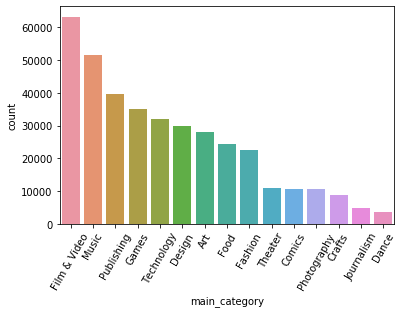

In [40]:
sns.countplot(dataframe['main_category'],order = dataframe['main_category'].value_counts().index)
plt.xticks(rotation=60)

In [41]:
mainCategorySuccess = dataframe[['main_category','success']]
mainCategorySuccess = mainCategorySuccess.groupby(['main_category']).mean().sort_values(by=['success'], ascending = False).reset_index()
mainCategorySuccess

,main_category,success
0,Dance,0.623467
1,Theater,0.601049
2,Comics,0.543796
3,Music,0.468597
4,Art,0.411689
5,Film & Video,0.373480
6,Games,0.358230
7,Design,0.354455
8,Publishing,0.310810
9,Photography,0.307986


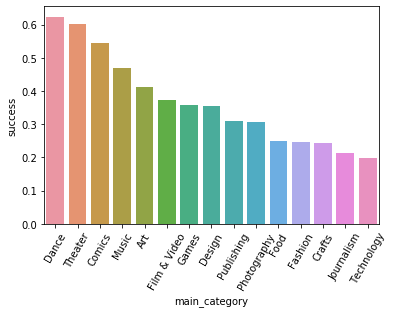

In [42]:
sns.barplot(x= 'main_category', y='success', data=mainCategorySuccess)
plt.xticks(rotation=60)
plt.savefig('main_category', dpi =150, transparent=True, bbox_inches='tight', pad_inches=0)


In [43]:
CategorySuccess = dataframe[['category','success']]
CategorySuccess = CategorySuccess.groupby(['category']).mean().sort_values(by=['success'], ascending = False).reset_index()
CategorySuccess

,category,success
0,Chiptune,0.771429
1,Residencies,0.724638
2,Anthologies,0.672258
3,Dance,0.665516
4,Letterpress,0.645833
...,...,...
154,Software,0.122929
155,Video,0.119718
156,Web,0.086914
157,Mobile Games,0.086538


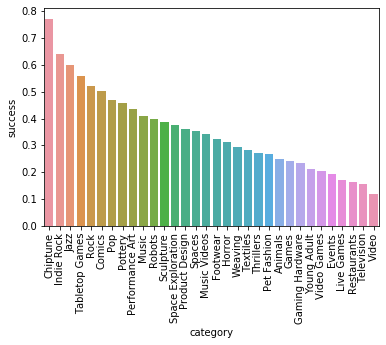

In [44]:
# plt.figure(figsize=(20,10))

sns.barplot(x= 'category', y='success', data=CategorySuccess[:159:5])
plt.xticks(rotation=90)
plt.savefig('sub_category', dpi =150, transparent=True, bbox_inches='tight', pad_inches=0)

In [45]:
currencySuccess = dataframe[['currency','success']]
currencySuccess = currencySuccess.groupby(['currency']).mean().sort_values(by = 'success')
currencySuccess =currencySuccess.reset_index()

In [46]:
currencySuccess

,currency,success
0,JPY,0.225806
1,EUR,0.227337
2,NOK,0.228291
3,MXN,0.240729
4,CHF,0.248340
5,AUD,0.255203
6,CAD,0.278913
7,SEK,0.287896
8,NZD,0.306011
9,DKK,0.325247


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

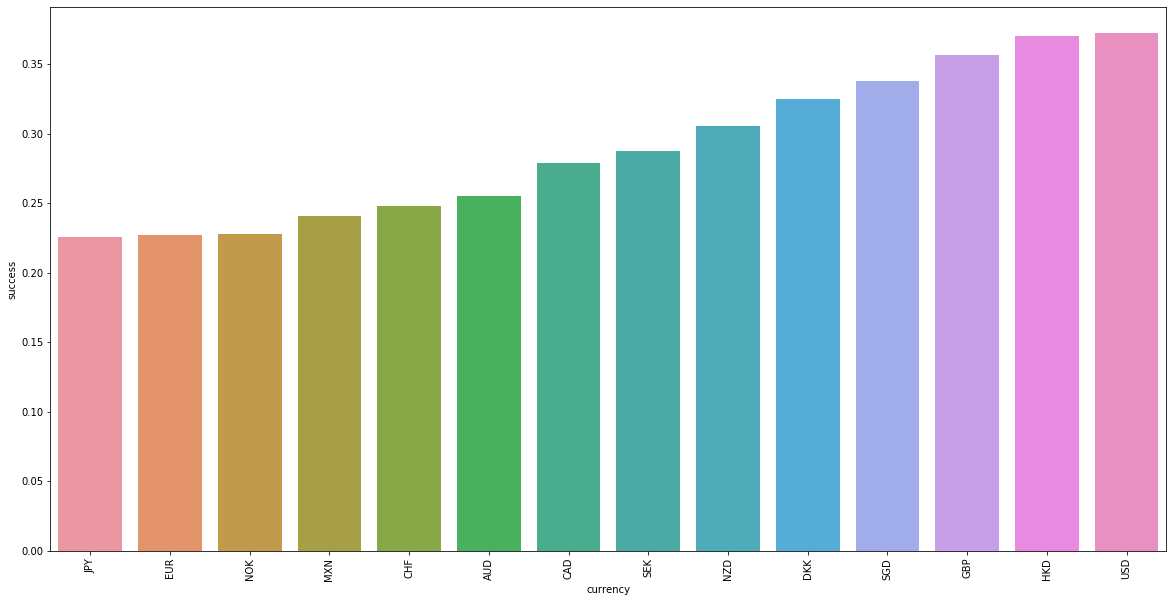

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'currency', y='success', data=currencySuccess)
plt.xticks(rotation=90)

In [48]:
countrySuccess = dataframe[['country','success']]
countrySuccess = countrySuccess.groupby(['country']).mean().sort_values(by='success')
countrySuccess =countrySuccess.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

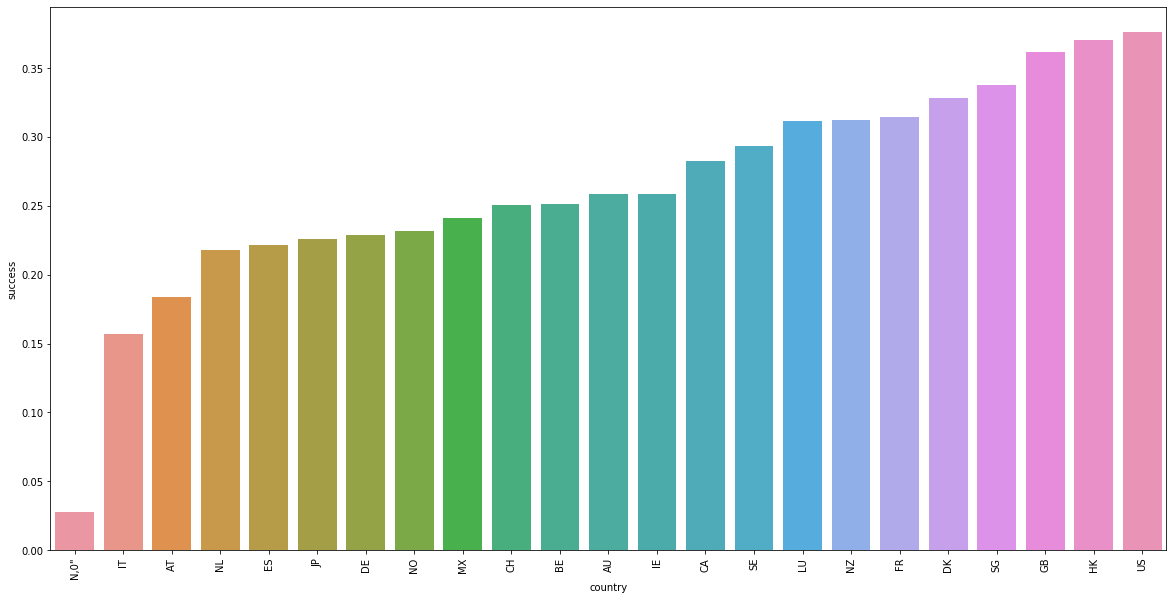

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'country', y='success', data=countrySuccess)
plt.xticks(rotation=90)

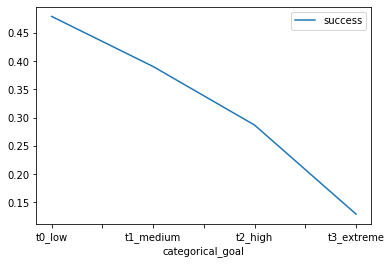

In [50]:
goalSuccess = dataframe[['categorical_goal','success']]
goalSuccess = goalSuccess.groupby(['categorical_goal']).mean()
goalSuccess.plot()

# at higher goal, low success rate. 

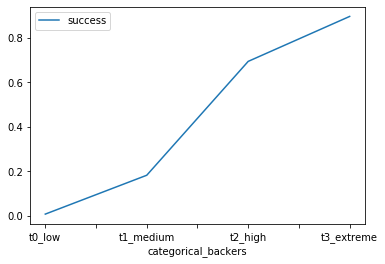

In [51]:
backerSuccess = dataframe[['categorical_backers','success']]
backerSuccess = backerSuccess.groupby(['categorical_backers']).mean()
backerSuccess.plot()

# more backers successrate is high

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_final = dataframe.apply(encoder.fit_transform)

data_final

,category,main_category,currency,country,success,total_year,total_month,total_day,total_hour,categorical_goal,categorical_backers
0,108,12,5,9,0,0,2,57,1379,0,0
1,93,6,13,22,0,0,2,58,1411,2,1
2,93,6,13,22,0,0,1,43,1055,2,1
3,90,10,13,22,0,0,1,28,692,1,0
4,55,6,13,22,0,0,1,54,1311,2,1
...,...,...,...,...,...,...,...,...,...,...,...
378656,39,6,13,22,0,0,1,29,717,3,0
378657,93,6,13,22,0,0,1,26,644,0,1
378658,93,6,13,22,0,0,1,44,1060,2,0
378659,138,13,13,22,0,0,1,29,701,2,1


# splitting the data

In [53]:
data_final.columns

Index(['category', 'main_category', 'currency', 'country', 'success',
       'total_year', 'total_month', 'total_day', 'total_hour',
       'categorical_goal', 'categorical_backers'],
      dtype='object')

In [54]:
y = data_final['success']
X = data_final.drop('success', axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [56]:
print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)

print('X_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)

X_train_shape:  (263097, 10)
y_train_shape:  (263097,)
X_test_shape:  (112757, 10)
y_test_shape:  (112757,)


In [57]:
df_result = pd.DataFrame()
df_result['y_test'] = y_test

# Logitistic Regression

In [95]:

from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(random_state=0)
reg_log.fit(X_train, y_train)
df_result['y_pred'] = reg_log.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Logistic regression Accuracy: ', round(accuracy_score(df_result['y_test'], df_result['y_pred']),2 )*100 , '%')

Logistic regression Accuracy:  87.0 %


# Neural Network

In [60]:
n_features = X_train.shape[1]
n_features

10

# Neural Network

In [66]:
# import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Train on 263097 samples, validate on 112757 samples
Epoch 1/100
263097/263097 [==============================] - 6s 21us/sample - loss: 0.8065 - accuracy: 0.6284 - val_loss: 0.5760 - val_accuracy: 0.6871
Epoch 2/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.5183 - accuracy: 0.7650 - val_loss: 0.3206 - val_accuracy: 0.8576
Epoch 3/100
263097/263097 [==============================] - 5s 20us/sample - loss: 0.4354 - accuracy: 0.8067 - val_loss: 0.3107 - val_accuracy: 0.8561
Epoch 4/100
263097/263097 [==============================] - 5s 19us/sample - loss: 0.3954 - accuracy: 0.8257 - val_loss: 0.3087 - val_accuracy: 0.8528
Epoch 5/100
263097/263097 [==============================] - 5s 20us/sample - loss: 0.3745 - accuracy: 0.8355 - val_loss: 0.4606 - val_accuracy: 0.8043
Epoch 6/100
263097/263097 [==============================] - 5s 19us/sample - loss: 0.3599 - accuracy: 0.8411 - val_loss: 0.3223 - val_accuracy: 0.8549
Epoch 7/100
263097/263097 [=========

263097/263097 [==============================] - 5s 18us/sample - loss: 0.2740 - accuracy: 0.8721 - val_loss: 0.2710 - val_accuracy: 0.8741
Epoch 55/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.2738 - accuracy: 0.8721 - val_loss: 0.2716 - val_accuracy: 0.8756
Epoch 56/100
263097/263097 [==============================] - 5s 19us/sample - loss: 0.2737 - accuracy: 0.8721 - val_loss: 0.2803 - val_accuracy: 0.8730
Epoch 57/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.2737 - accuracy: 0.8727 - val_loss: 0.2698 - val_accuracy: 0.8761
Epoch 58/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.2734 - accuracy: 0.8726 - val_loss: 0.2717 - val_accuracy: 0.8758
Epoch 59/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.2735 - accuracy: 0.8723 - val_loss: 0.2750 - val_accuracy: 0.8745
Epoch 60/100
263097/263097 [==============================] - 5s 18us/sample - loss: 0.2731 - a

In [62]:
# fit the model
# %%time


# plot learning curves
# pyplot.title('Learning Curves')
# pyplot.xlabel('Epoch')
# pyplot.ylabel('Cross Entropy')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
# pyplot.legend()
# pyplot.show()

In [67]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

112757/112757 [==============================] - 3s 27us/sample - loss: 0.2692 - accuracy: 0.8757
Test Accuracy: 0.876


In [68]:
print(loss, acc)

0.2692268277253427 0.875715


In [64]:
model.predict_proba(([108,12, 5,9,0,2,57,1379,0,0],))

array([[0.03479389]], dtype=float32)

In [86]:
((model.predict_proba(([123, 7, 13,22,0,2,34,826,3,3],)))[0][0]>=0.5).astype('int')

1